In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import tensorflow as tf

In [2]:
def plot_model(model, feature_labmda, xy, labels, title=''):
    from pandas import DataFrame
    xx, yy = np.meshgrid(np.linspace(-1.3,1.3, 400), np.linspace(-1.3,1.3, 400))
    input_xy = np.array([feature_labmda(xxval, yyval) for xxval, yyval in zip(xx.flatten(), yy.flatten())])
    prediction = model(input_xy).numpy()
    Z = prediction.reshape(xx.shape)
    df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
    markers = {0:'bs', 1:'r^'}
    _, ax = plt.subplots(figsize=(8, 8))
    cs = ax.contourf(xx, yy, Z, 50, cmap='coolwarm', alpha=.8)
    ax.clabel(cs, colors='k', manual=[])
    cs = ax.contour(xx, yy, Z, cmap=plt.cm.Greys, levels=[0, 0.5], linestyles='--', linewidths=1)
    ax.clabel(cs, colors='k', manual=[])
    for k, xy0 in df[['x', 'y']].iterrows():
        x0, y0 = xy0.values
        plt.plot(x0, y0, markers[labels[k][0]], mec='k')

    ax.set_xlim([-1.3, 1.3])
    ax.set_ylim([-1.3, 1.3])
    plt.grid(linestyle='--', alpha=0.5)
    plt.title(title)
    plt.show()

**<span style="font-size: 30px; color: skyblue">(Exercise 1) 원형 분류 예제</span>** 

In [3]:
# 데이터 생성
xy, labels = make_circles(n_samples=200, noise=0.1, random_state=717)
labels = labels.reshape(-1,1)

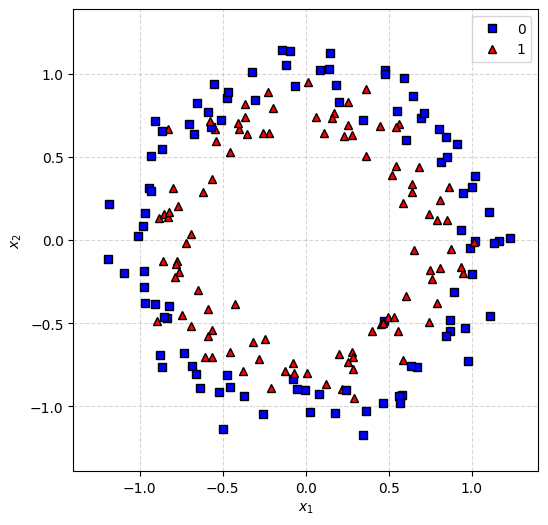

In [4]:
from pandas import DataFrame
# scatter plot, dots colored by class value
df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
colors = {0:'red', 1:'blue'}
_, ax = plt.subplots(figsize=(6, 6))
grouped = df.groupby('label')
markers = {0:'bs', 1:'r^'}
for k, xy0 in df[['x', 'y']].iterrows():
        x0, y0 = xy0.values
        plt.plot(x0, y0, markers[labels[k][0]], mec='k')
plt.axis('equal')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_xlim([-1.4, 1.4])
ax.set_ylim([-1.4, 1.4])
plt.legend([0, 1])
plt.show()

**<span style="font-size: 20px; color: orange">(practice 1) </span>** 

In [5]:
# 신경망 모델
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
        tf.random.set_seed(20)

        num_hidden1 = 5
        num_hidden2 = 5
        
        self.W1 = tf.Variable(tf.random.normal([2, num_hidden1], seed=624))
        self.b1 = tf.Variable(tf.random.normal([num_hidden1], seed=624))

        self.W2 = tf.Variable(tf.random.normal([num_hidden1 , num_hidden2], seed=624))
        self.b2 = tf.Variable(tf.random.normal([num_hidden2], seed=624))

        self.W3 = tf.Variable(tf.random.normal([num_hidden2 , 1], seed=624))
        self.b3 = tf.Variable(tf.random.normal([1], seed=624))

    def call(self, x):
        l1 = tf.matmul(x, self.W1) + self.b1
        h1 = tf.nn.sigmoid(l1)

        l2 = tf.matmul(h1, self.W2) + self.b2
        h2 = tf.nn.sigmoid(l2)

        l3 = tf.matmul(h2, self.W3) + self.b3
        yhat = tf.nn.sigmoid(l3)
        return yhat

In [6]:
# 특성값
f_fn = lambda x,y: [x, y]
features = np.array([f_fn(xval, yval) for xval, yval in xy])

# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

# 하이퍼 파라미터
MaxEpochs = 1000
lr = 0.05
batch_size = 10

# 수치 최적화 방법 및 손실함수
optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.BinaryCrossentropy()
# 컴파일 및 학습
model = MyModel()
model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])
model.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, shuffle=False)

Epoch 1/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.7122 - accuracy: 0.4950
Epoch 2/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.7045 - accuracy: 0.4800
Epoch 3/1000
20/20 [==============================] - 0s 877us/step - loss: 0.6895 - accuracy: 0.5400
Epoch 4/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5000
Epoch 5/1000
20/20 [==============================] - 0s 818us/step - loss: 0.6861 - accuracy: 0.5300
Epoch 6/1000
20/20 [==============================] - 0s 823us/step - loss: 0.6829 - accuracy: 0.5500
Epoch 7/1000
20/20 [==============================] - 0s 961us/step - loss: 0.6792 - accuracy: 0.5700
Epoch 8/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.5750
Epoch 9/1000
20/20 [==============================] - 0s 951us/step - loss: 0.6703 - accuracy: 0.5850
Epoch 10/1000
20/20 [==============================] - 0s 824us/step - loss: 0.6653 - accu

In [7]:
# 예측 및 손실함수
prediction_values = model(features).numpy()
final_loss = model.evaluate(features,labels)
print(final_loss)

7/7 [==============================] - 0s 1ms/step - loss: 0.2093 - accuracy: 0.9000
[0.20931755006313324, 0.8999999761581421]


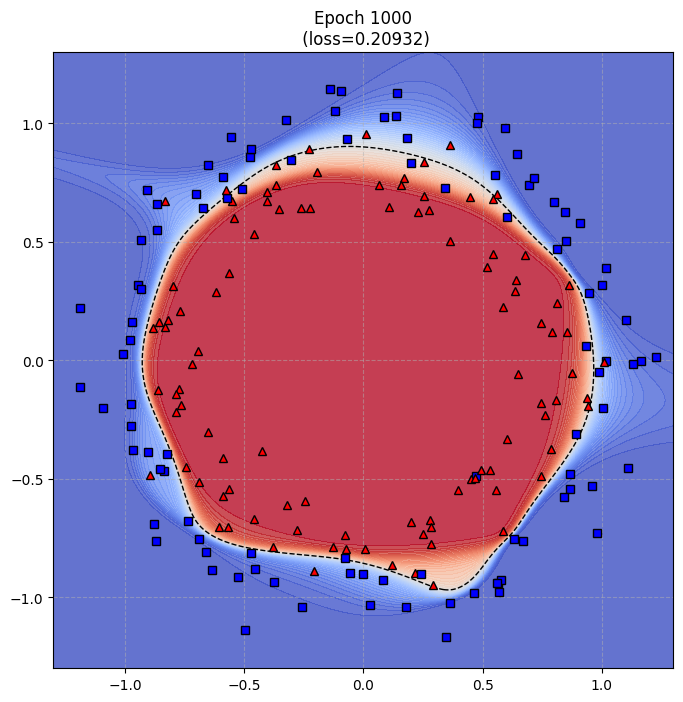

In [8]:
plot_model(model, f_fn, xy, labels, 'Epoch {}\n (loss={:1.5f})'.format(MaxEpochs, final_loss[0]))

**<span style="font-size: 20px; color: orange">(practice 2) </span>** 

In [9]:
# 신경망 모델
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
        tf.random.set_seed(20)

        num_hidden1 = 100
        num_hidden2 = 100
        num_hidden3 = 100
        num_hidden4 = 100
        
        self.W1 = tf.Variable(tf.random.normal([2, num_hidden1], seed=624))
        self.b1 = tf.Variable(tf.random.normal([num_hidden1], seed=624))

        self.W2 = tf.Variable(tf.random.normal([num_hidden1 , num_hidden2], seed=624))
        self.b2 = tf.Variable(tf.random.normal([num_hidden2], seed=624))

        self.W3 = tf.Variable(tf.random.normal([num_hidden2 , num_hidden3], seed=624))
        self.b3 = tf.Variable(tf.random.normal([num_hidden3], seed=624))

        self.W4 = tf.Variable(tf.random.normal([num_hidden3 , num_hidden4], seed=624))
        self.b4 = tf.Variable(tf.random.normal([num_hidden4], seed=624))

        self.W5 = tf.Variable(tf.random.normal([num_hidden4 , 1], seed=624))
        self.b5 = tf.Variable(tf.random.normal([1], seed=624))

    def call(self, x):
        l1 = tf.matmul(x, self.W1) + self.b1
        h1 = tf.nn.sigmoid(l1)

        l2 = tf.matmul(h1, self.W2) + self.b2
        h2 = tf.nn.sigmoid(l2)

        l3 = tf.matmul(h2, self.W3) + self.b3
        h3 = tf.nn.sigmoid(l3)

        l4 = tf.matmul(h3, self.W4) + self.b4
        h4 = tf.nn.sigmoid(l4)
        
        l5 = tf.matmul(h4, self.W5) + self.b5
        yhat = tf.nn.sigmoid(l5)
        return yhat

In [10]:
# 특성값
f_fn = lambda x,y: [x, y]
features = np.array([f_fn(xval, yval) for xval, yval in xy])

# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

# 하이퍼 파라미터
MaxEpochs = 1000
lr = 0.05
batch_size = 10

# 수치 최적화 방법 및 손실함수
optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.BinaryCrossentropy()
# 컴파일 및 학습
model = MyModel()
model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])
model.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, shuffle=False)

Epoch 1/1000
20/20 [==============================] - 1s 1ms/step - loss: 1.4620 - accuracy: 0.5100
Epoch 2/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.8251 - accuracy: 0.4500
Epoch 3/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.7591 - accuracy: 0.4600
Epoch 4/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.7754 - accuracy: 0.4500
Epoch 5/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.7925 - accuracy: 0.4500
Epoch 6/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.7901 - accuracy: 0.4500
Epoch 7/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.7920 - accuracy: 0.4500
Epoch 8/1000
20/20 [==============================] - 0s 684us/step - loss: 0.7940 - accuracy: 0.4500
Epoch 9/1000
20/20 [==============================] - 0s 882us/step - loss: 0.7944 - accuracy: 0.4500
Epoch 10/1000
20/20 [==============================] - 0s 913us/step - loss: 0.7948 - accuracy: 

In [11]:
# 예측 및 손실함수
prediction_values = model(features).numpy()
final_loss = model.evaluate(features,labels)
print(final_loss)

7/7 [==============================] - 0s 0s/step - loss: 0.7396 - accuracy: 0.5000
[0.7395665049552917, 0.5]


In [12]:
# 특성값
f_fn = lambda x,y: [x, y]
features = np.array([f_fn(xval, yval) for xval, yval in xy])

# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

# 하이퍼 파라미터
MaxEpochs = 5000
lr = 0.0005
batch_size = 10

# 수치 최적화 방법 및 손실함수
optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.BinaryCrossentropy()
# 컴파일 및 학습
model = MyModel()
model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])
model.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, shuffle=False)

Epoch 1/5000
20/20 [==============================] - 1s 2ms/step - loss: 0.6835 - accuracy: 0.5600
Epoch 2/5000
20/20 [==============================] - 0s 846us/step - loss: 0.6054 - accuracy: 0.7300
Epoch 3/5000
20/20 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.7700
Epoch 4/5000
20/20 [==============================] - 0s 790us/step - loss: 0.5182 - accuracy: 0.8050
Epoch 5/5000
20/20 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.8250
Epoch 6/5000
20/20 [==============================] - 0s 825us/step - loss: 0.4620 - accuracy: 0.8300
Epoch 7/5000
20/20 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.8400
Epoch 8/5000
20/20 [==============================] - 0s 316us/step - loss: 0.4233 - accuracy: 0.8450
Epoch 9/5000
20/20 [==============================] - 0s 1ms/step - loss: 0.4089 - accuracy: 0.8400
Epoch 10/5000
20/20 [==============================] - 0s 1ms/step - loss: 0.3971 - accuracy

In [13]:
# 예측 및 손실함수
prediction_values = model(features).numpy()
final_loss = model.evaluate(features,labels)
print(final_loss)

7/7 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9900
[0.02555828168988228, 0.9900000095367432]


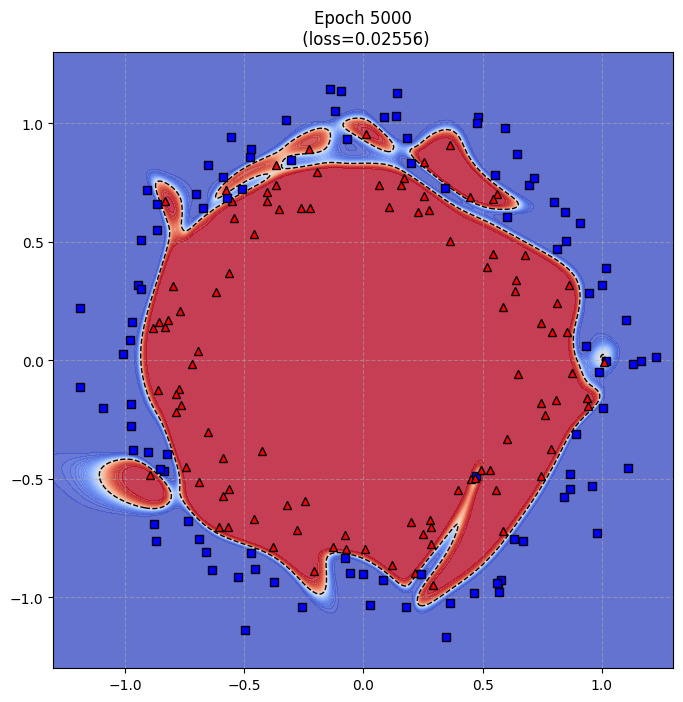

In [14]:
plot_model(model, f_fn, xy, labels, 'Epoch {}\n (loss={:1.5f})'.format(MaxEpochs, final_loss[0]))

**<span style="font-size: 20px; color: orange">(practice 3) </span>** 

In [15]:
# 신경망 모델
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
        tf.random.set_seed(20)

        num_hidden1 = 100
        num_hidden2 = 100
        num_hidden3 = 100
        num_hidden4 = 100
        
        self.W1 = tf.Variable(tf.random.normal([2, num_hidden1], seed=624))
        self.b1 = tf.Variable(tf.random.normal([num_hidden1], seed=624))

        self.W2 = tf.Variable(tf.random.normal([num_hidden1 , num_hidden2], seed=624))
        self.b2 = tf.Variable(tf.random.normal([num_hidden2], seed=624))

        self.W3 = tf.Variable(tf.random.normal([num_hidden2 , num_hidden3], seed=624))
        self.b3 = tf.Variable(tf.random.normal([num_hidden3], seed=624))

        self.W4 = tf.Variable(tf.random.normal([num_hidden3 , num_hidden4], seed=624))
        self.b4 = tf.Variable(tf.random.normal([num_hidden4], seed=624))

        self.W5 = tf.Variable(tf.random.normal([num_hidden4 , 1], seed=624))
        self.b5 = tf.Variable(tf.random.normal([1], seed=624))

    def call(self, x):
        l1 = tf.matmul(x, self.W1) + self.b1
        h1 = tf.nn.relu(l1)

        l2 = tf.matmul(h1, self.W2) + self.b2
        h2 = tf.nn.sigmoid(l2)

        l3 = tf.matmul(h2, self.W3) + self.b3
        h3 = tf.nn.relu(l3)

        l4 = tf.matmul(h3, self.W4) + self.b4
        h4 = tf.nn.sigmoid(l4)
        
        l5 = tf.matmul(h4, self.W5) + self.b5
        yhat = tf.nn.sigmoid(l5)
        return yhat

In [16]:
# 특성값
f_fn = lambda x,y: [x, y]
features = np.array([f_fn(xval, yval) for xval, yval in xy])

# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

# 하이퍼 파라미터
MaxEpochs = 10000
lr = 0.0001
batch_size = 10

# 수치 최적화 방법 및 손실함수
optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.BinaryCrossentropy()
# 컴파일 및 학습
model = MyModel()
model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])
model.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, shuffle=False)

Epoch 1/10000
20/20 [==============================] - 2s 5ms/step - loss: 1.7765 - accuracy: 0.5000
Epoch 2/10000
20/20 [==============================] - 0s 7ms/step - loss: 1.4824 - accuracy: 0.5150
Epoch 3/10000
20/20 [==============================] - 0s 5ms/step - loss: 1.2888 - accuracy: 0.5150
Epoch 4/10000
20/20 [==============================] - 0s 3ms/step - loss: 1.1320 - accuracy: 0.5150
Epoch 5/10000
20/20 [==============================] - 0s 3ms/step - loss: 0.9966 - accuracy: 0.5250
Epoch 6/10000
20/20 [==============================] - 0s 4ms/step - loss: 0.8914 - accuracy: 0.5500
Epoch 7/10000
20/20 [==============================] - 0s 3ms/step - loss: 0.8118 - accuracy: 0.5950
Epoch 8/10000
20/20 [==============================] - 0s 4ms/step - loss: 0.7490 - accuracy: 0.6300
Epoch 9/10000
20/20 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.6450
Epoch 10/10000
20/20 [==============================] - 0s 3ms/step - loss: 0.6677 - accura

In [17]:
# 예측 및 손실함수
prediction_values = model(features).numpy()
final_loss = model.evaluate(features,labels)
print(final_loss)

7/7 [==============================] - 0s 2ms/step - loss: 4.3687e-05 - accuracy: 1.0000
[4.368746158434078e-05, 1.0]


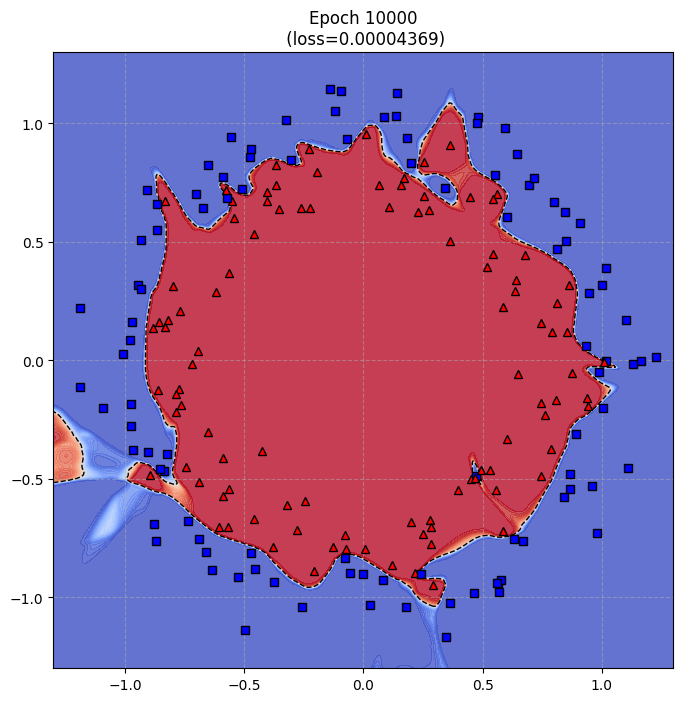

In [18]:
plot_model(model, f_fn, xy, labels, 'Epoch {}\n (loss={:1.8f})'.format(MaxEpochs, final_loss[0]))

**<span style="font-size: 30px; color: skyblue">(Exercise 2) 체커 보드 분류 예제</span>** 

In [19]:
# 데이터
np.random.seed(410)
xy = np.random.uniform(-1,1, (200,2))
labels = np.zeros((200), dtype=np.int32)
labels[xy[:,0] * xy[:,1] > 0] = 1
labels = labels.reshape(-1, 1)

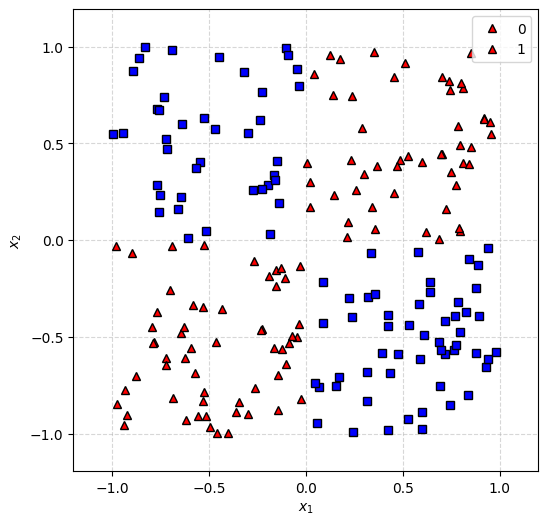

In [20]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
colors = {0:'red', 1:'blue'}
_, ax = plt.subplots(figsize=(6, 6))
grouped = df.groupby('label')
markers = {0:'bs', 1:'r^'}
for k, xy0 in df[['x', 'y']].iterrows():
    x0, y0 = xy0.values
    plt.plot(x0, y0, markers[labels[k][0]], mec='k')
plt.axis('equal')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
plt.legend([0, 1])
plt.show()

**<span style="font-size: 20px; color: orange">(practice 1) </span>** 

In [21]:
# 신경망 모델
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
                
        tf.random.set_seed(20)

        num_hidden1 = 5
        num_hidden2 = 5
        
        self.W1 = tf.Variable(tf.random.normal([2, num_hidden1], seed=624))
        self.b1 = tf.Variable(tf.random.normal([num_hidden1], seed=624))

        self.W2 = tf.Variable(tf.random.normal([num_hidden1 , num_hidden2], seed=624))
        self.b2 = tf.Variable(tf.random.normal([num_hidden2], seed=624))

        self.W3 = tf.Variable(tf.random.normal([num_hidden2 , 1], seed=624))
        self.b3 = tf.Variable(tf.random.normal([1], seed=624))

    def call(self, x):
        l1 = tf.matmul(x, self.W1) + self.b1
        h1 = tf.nn.sigmoid(l1)

        l2 = tf.matmul(h1, self.W2) + self.b2
        h2 = tf.nn.sigmoid(l2)

        l3 = tf.matmul(h2, self.W3) + self.b3
        yhat = tf.nn.sigmoid(l3)
        return yhat

In [22]:
# 특성값
f_fn = lambda x,y: [x, y]
features = np.array([f_fn(xval, yval) for xval, yval in xy])

# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

# 하이퍼 파라미터
MaxEpochs = 1000
lr = 0.05
batch_size = 10

# 수치 최적화 방법 및 손실함수
optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.BinaryCrossentropy()

# 컴파일 및 학습
model = MyModel()
model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])
model.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, shuffle=False)

Epoch 1/1000
20/20 [==============================] - 0s 972us/step - loss: 0.7316 - accuracy: 0.4500
Epoch 2/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.6100
Epoch 3/1000
20/20 [==============================] - 0s 848us/step - loss: 0.6753 - accuracy: 0.6900
Epoch 4/1000
20/20 [==============================] - 0s 867us/step - loss: 0.6386 - accuracy: 0.7100
Epoch 5/1000
20/20 [==============================] - 0s 887us/step - loss: 0.5891 - accuracy: 0.7300
Epoch 6/1000
20/20 [==============================] - 0s 926us/step - loss: 0.5499 - accuracy: 0.7450
Epoch 7/1000
20/20 [==============================] - 0s 878us/step - loss: 0.5102 - accuracy: 0.7400
Epoch 8/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.4565 - accuracy: 0.7400
Epoch 9/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3988 - accuracy: 0.7850
Epoch 10/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.3546 - accu

In [23]:
# 예측 및 손실함수
prediction_values = model(features).numpy()
final_loss = model.evaluate(features,labels)
print(final_loss)

7/7 [==============================] - 0s 1ms/step - loss: 1.1224e-07 - accuracy: 1.0000
[1.1223950480143685e-07, 1.0]


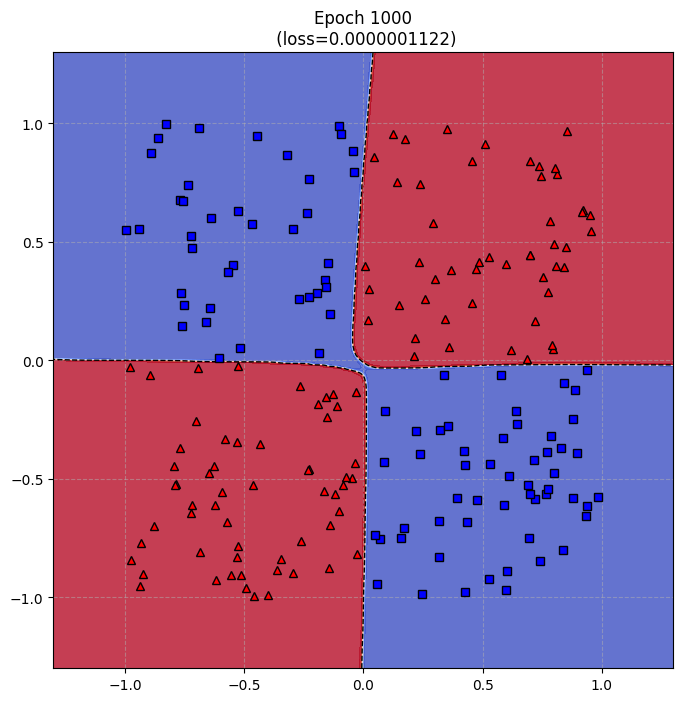

In [24]:
plot_model(model, f_fn, xy, labels, 'Epoch {}\n (loss={:1.10f})'.format(MaxEpochs, final_loss[0]))

**<span style="font-size: 30px; color: skyblue">(Exercise 3) 불규칙 데이터 분류 예제</span>** 

In [25]:
from sklearn.datasets import make_blobs
# 불규칙 데이터 생성
xy, labels = make_blobs(n_samples=200, center_box=(-1,1), centers=6,cluster_std=0.1, random_state=20)
labels = labels % 2
labels = labels.reshape(-1,1)

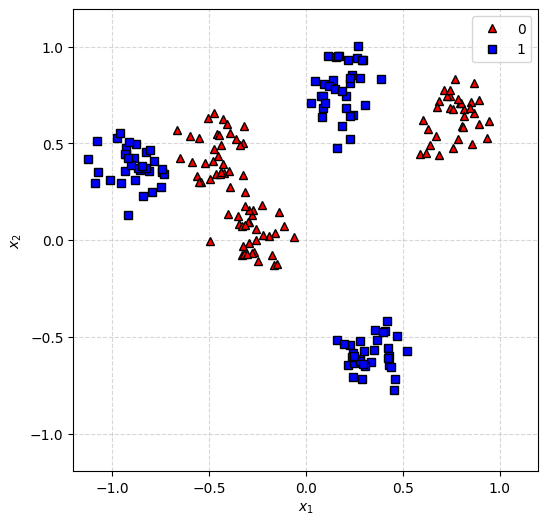

In [26]:
df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
colors = {0:'red', 1:'blue'}
_, ax = plt.subplots(figsize=(6, 6))
grouped = df.groupby('label')
markers = {0:'bs', 1:'r^'}
for k, xy0 in df[['x', 'y']].iterrows():
    x0, y0 = xy0.values
    plt.plot(x0, y0, markers[labels[k][0]], mec='k')
plt.axis('equal')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
plt.legend([0, 1])
plt.show()

**<span style="font-size: 20px; color: orange">(practice 1) </span>** 

In [27]:
# 신경망 모델
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
                        
        tf.random.set_seed(20)

        num_hidden1 = 5
        num_hidden2 = 5
        
        self.W1 = tf.Variable(tf.random.normal([2, num_hidden1], seed=624))
        self.b1 = tf.Variable(tf.random.normal([num_hidden1], seed=624))

        self.W2 = tf.Variable(tf.random.normal([num_hidden1 , num_hidden2], seed=624))
        self.b2 = tf.Variable(tf.random.normal([num_hidden2], seed=624))

        self.W3 = tf.Variable(tf.random.normal([num_hidden2 , 1], seed=624))
        self.b3 = tf.Variable(tf.random.normal([1], seed=624))

    def call(self, x):
        l1 = tf.matmul(x, self.W1) + self.b1
        h1 = tf.nn.sigmoid(l1)

        l2 = tf.matmul(h1, self.W2) + self.b2
        h2 = tf.nn.sigmoid(l2)

        l3 = tf.matmul(h2, self.W3) + self.b3
        yhat = tf.nn.sigmoid(l3)
        return yhat

In [28]:
# 특성값
f_fn = lambda x,y: [x, y]
features = np.array([f_fn(xval, yval) for xval, yval in xy])
# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

# 하이퍼 파라미터
MaxEpochs = 1000
lr = 0.05
batch_size = 10

# 수치 최적화 방법 및 손실함수
optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.BinaryCrossentropy()

# 컴파일 및 학습
model = MyModel()
model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])
model.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, shuffle=False)

Epoch 1/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.7034 - accuracy: 0.4950
Epoch 2/1000
20/20 [==============================] - 0s 907us/step - loss: 0.6968 - accuracy: 0.5100
Epoch 3/1000
20/20 [==============================] - 0s 941us/step - loss: 0.6708 - accuracy: 0.5550
Epoch 4/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.6585 - accuracy: 0.5550
Epoch 5/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.6388 - accuracy: 0.5750
Epoch 6/1000
20/20 [==============================] - 0s 961us/step - loss: 0.6186 - accuracy: 0.6050
Epoch 7/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.5946 - accuracy: 0.6200
Epoch 8/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.5514 - accuracy: 0.6900
Epoch 9/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.4881 - accuracy: 0.7650
Epoch 10/1000
20/20 [==============================] - 0s 947us/step - loss: 0.4341 - accuracy

In [29]:
# 예측 및 손실함수
prediction_values = model(features).numpy()
final_loss = model.evaluate(features,labels)
print(final_loss)

7/7 [==============================] - 0s 1ms/step - loss: 2.1295e-07 - accuracy: 1.0000
[2.129501979197812e-07, 1.0]


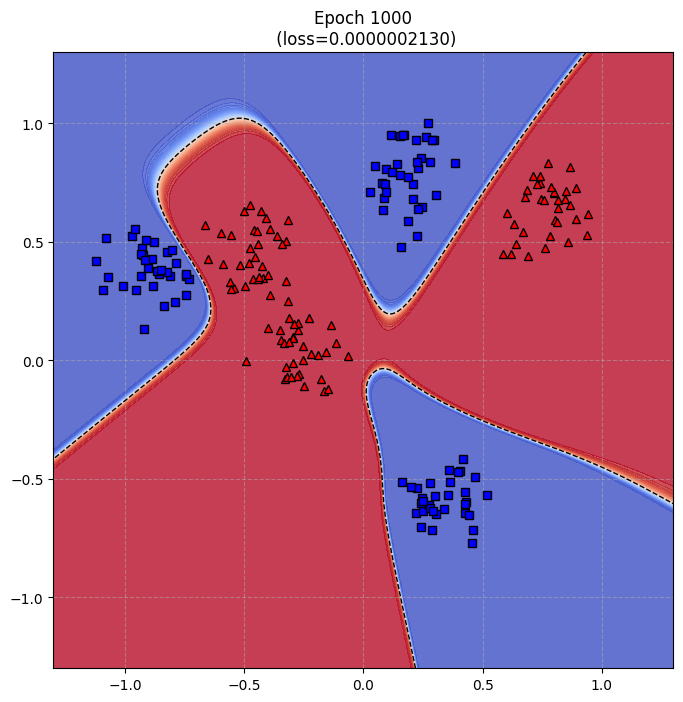

In [30]:
plot_model(model, f_fn, xy, labels, 'Epoch {}\n (loss={:1.10f})'.format(MaxEpochs, final_loss[0]))